In [ ]:
"""                                Plot of some examples
        1.“negative” examples: eSTRs with good ANOVA p-value but poor CAVIAR score and SNPs probably the top variants 
"""

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats
import seaborn as sns

SHORTEN = {
    "Artery-Aorta":"Artery.A"     ,
    "Artery-Tibial": "Artery.T",
    "Adipose-Subcutaneous": "Adipose.S",    
    "Adipose-Visceral":"Adipose.V",
    "Brain-Caudate":"Caudate"   , 
    "Brain-Cerebellum":"Cerebellum",
    "Cells-Transformedfibroblasts": "Fibroblast",
    "Esophagus-Mucosa": "Mucosa",
    "Esophagus-Muscularis":"Muscularis",
    "Heart-LeftVentricle":"Heart",
    "Lung": "Lung",
    "Muscle-Skeletal": "Muscle",
    "Nerve-Tibial":"Nerve",
    "Skin-NotSunExposed": "SkinUnexposed",
    "Skin-SunExposed":"SkinLeg",
    "Thyroid":"Thyroid",
    "WholeBlood": "Blood"
}
TISSUE=sorted(SHORTEN.keys())
COLORS = {
    "Artery-Aorta":"salmon",
    "Artery-Tibial": "red",
    "Adipose-Subcutaneous": "darkorange",    
    "Adipose-Visceral":"orange",
    "Brain-Caudate":"lemonchiffon"   , 
    "Brain-Cerebellum":"yellow",
    "Cells-Transformedfibroblasts": "skyblue",
    "Esophagus-Mucosa": "sienna",
    "Esophagus-Muscularis":"burlywood",
    "Heart-LeftVentricle":"darkviolet",
    "Lung": "greenyellow",
    "Muscle-Skeletal": "mediumslateblue",
    "Nerve-Tibial":"gold",
    "Skin-NotSunExposed":"blue",
    "Skin-SunExposed":"cornflowerblue",
    "Thyroid":"green",
    "WholeBlood": "m",
    "permuted": "gray"
}

def ExtractData(gene, chrom, start, tissue):
    """By MG"""
    if "(" in tissue: tissue = tissue.split("(")[0]
    vcf = "/storage/szfeupe/Runs/650GTEx_estr/Merged_STRs_all_samples.vcf.gz"
    # Pull out STR genotypes
    cmd = """bcftools query -r %s:%s-%s -f"[%%SAMPLE\\t%%GB\\n]" %s | \
    grep -v "\." | sed 's/|/\\t/' | awk '{print $1 "\\t" $2+$3}' > str_genotypes.tab"""%(chrom, start, start, vcf)
    os.system(cmd)
    # Pull out STR genotypes - alleles
    cmd = """bcftools query -r %s:%s-%s -f"[%%SAMPLE\\t%%GB\\n]" %s | \
    grep -v "\." | sed 's/|/\\t/' | awk '{print $1 "\\t" $2","$3}' > str_genotypes_alleles.tab"""%(chrom, start, start, vcf)
    os.system(cmd)
    # Pull out gene expression
    expr="/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/%s/Corr_Expr.csv"%tissue
    colnum = open(expr,"r").readline().split(",").index('"' + gene + '"')+2
    cmd = """cat %s | cut -d',' -f 1,%s | grep -v ENSG > expr.tab"""%(expr, colnum)
    os.system(cmd)
    
def PlotESTR(gene, tissue, chrom, start, COLORS, name, motif,caviar):
    strgt = pd.read_csv("str_genotypes.tab", sep="\t", names=["sample","str"])
    strgt["sample"] = strgt["sample"].apply(lambda x: "-".join(x.split("-")[0:2]))
    
    rmgts = []
    for gt in sorted(list(set(strgt["str"]))):
        if strgt[strgt["str"]==gt].shape[0] <3: rmgts.append(gt)
    strgt = strgt[strgt["str"].apply(lambda x: x not in rmgts)]
        
    fig = plt.figure()
    ax = fig.add_subplot(111)
    expr = pd.read_csv("expr.tab", names=["sample","expr"])
    data = pd.merge(strgt, expr)
    sns.swarmplot(x="str", y="expr", ax=ax, data=data, color=COLORS[tissue])
    ax.set_xlabel("bp (rel. to hg19)", size=10)
    ax.set_ylabel("Expression - %s"%SHORTEN[tissue], size=10)
    ax.set_xticklabels([int(item) for item in sorted(list(set(data["str"])))], size=10)
    ax.set_yticklabels(["%.2f"%(item) for item in ax.get_yticks()], size=10)
    ax.set_title("")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title("chr%s:%s - %s (%s) \nMotif: %s - Caviar score: %s"%(chrom, start, gene,name,motif,caviar))
    plt.suptitle("");
    plt.show()
    fig.savefig("../pdfs/Poor_estrs/%s_poor_causal_estr.pdf"%gene)
    

merged_t = pd.read_csv('/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/LR_SummaryTest_Table.tsv', sep='\t')
cmerged = pd.read_csv('/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/Merged_Best_causality.Table', sep='\t')
cmerged = cmerged.loc[(cmerged['best.q']<=0.1)&(cmerged['best.score']<0.01)]

----- Adipose-Subcutaneous -----

ANOVA p=  3.081659563191482e-05 	Caviar score =  0.00161506


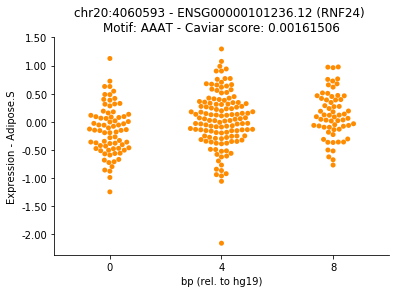

----- Adipose-Visceral -----

ANOVA p=  0.00010852330053575614 	Caviar score =  0.00489643


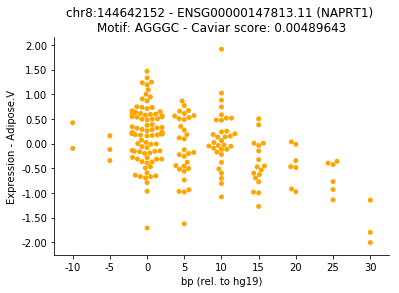

----- Artery-Aorta -----

ANOVA p=  0.0002016506637040385 	Caviar score =  0.00107731


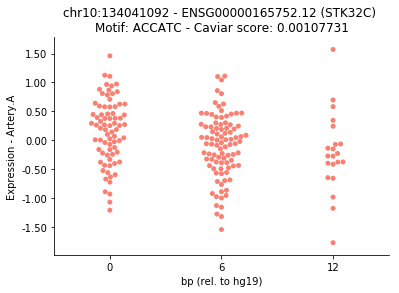

----- Artery-Tibial -----

ANOVA p=  9.610513517887215e-05 	Caviar score =  4.33228e-05


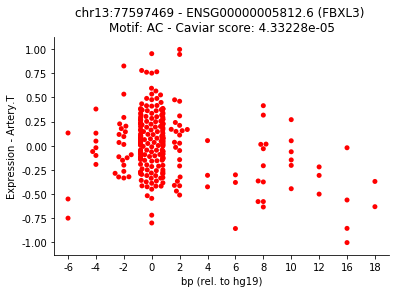

----- Brain-Caudate -----

ANOVA p=  0.00026796207958247766 	Caviar score =  0.000196468


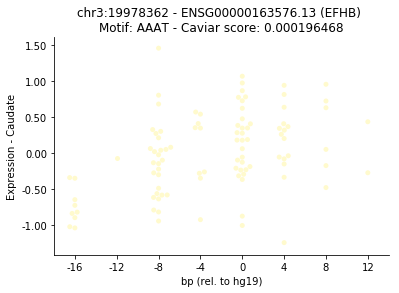

----- Brain-Cerebellum -----

ANOVA p=  7.218013056856853e-05 	Caviar score =  2.40875e-05


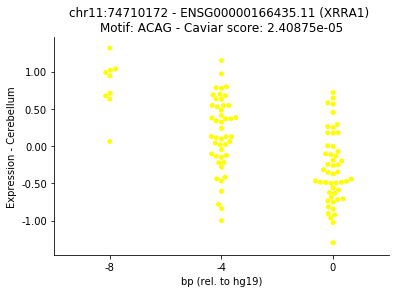

----- Cells-Transformedfibroblasts -----

ANOVA p=  5.50001132561165e-05 	Caviar score =  6.07303e-06


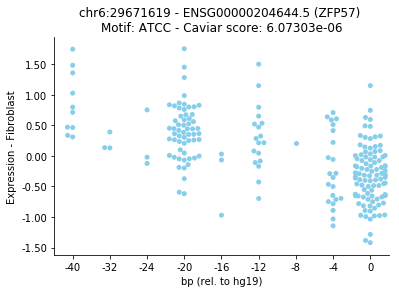

----- Esophagus-Mucosa -----

ANOVA p=  6.409114289641754e-05 	Caviar score =  5.65722e-05


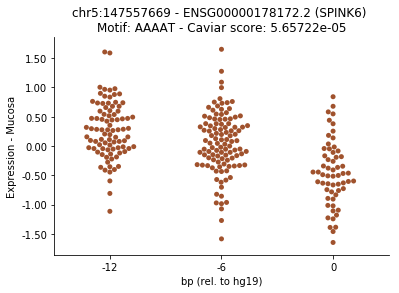

----- Esophagus-Muscularis -----

ANOVA p=  1.1480467204378196e-05 	Caviar score =  0.00685519


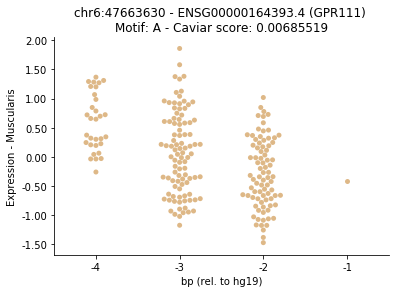

----- Heart-LeftVentricle -----

ANOVA p=  8.520897349082888e-05 	Caviar score =  0.000995244


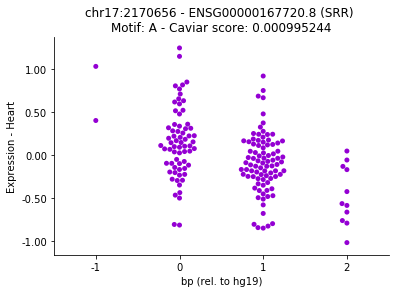

----- Lung -----

ANOVA p=  0.00018016687541402558 	Caviar score =  1.32571e-18


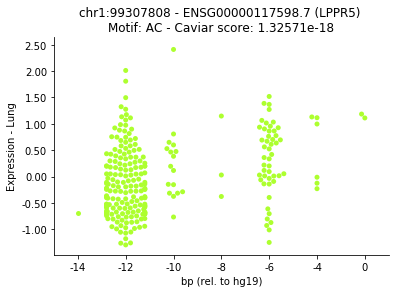

----- Muscle-Skeletal -----

ANOVA p=  1.0210879720465688e-05 	Caviar score =  0.00021577


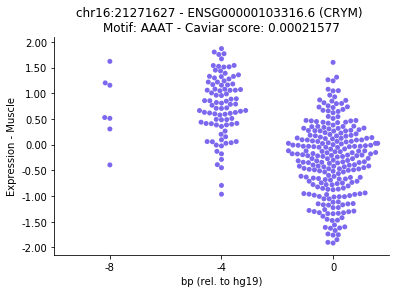

----- Nerve-Tibial -----

ANOVA p=  1.596224278100376e-05 	Caviar score =  2.14407e-09


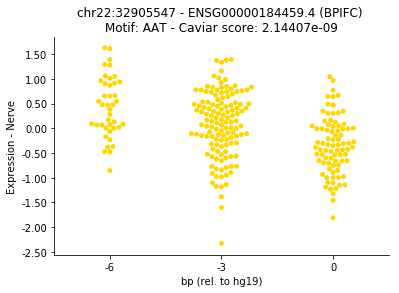

----- Skin-NotSunExposed -----

ANOVA p=  2.7193542533484665e-05 	Caviar score =  3.1838e-06


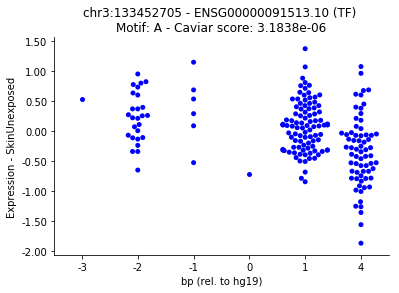

----- Skin-SunExposed -----

ANOVA p=  2.806657492461626e-05 	Caviar score =  1.68477e-05


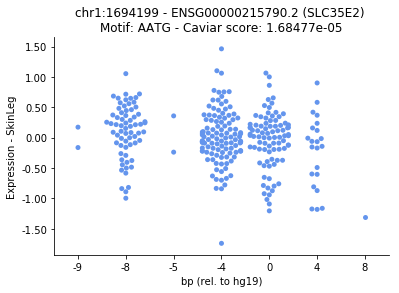

----- Thyroid -----

ANOVA p=  1.0849642099820253e-05 	Caviar score =  6.20938e-12


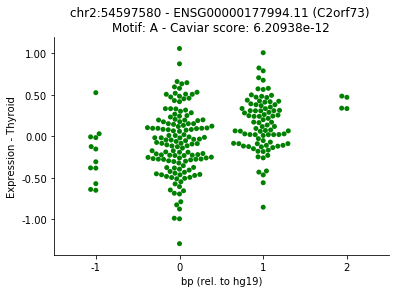

----- WholeBlood -----

ANOVA p=  1.5212662524527728e-05 	Caviar score =  4.71352e-11


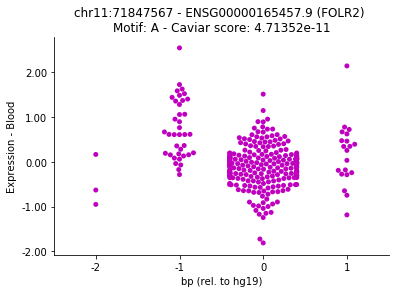

In [16]:
for tissue in TISSUE:
    data = pd.read_csv('/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/'+tissue+'/Master.table', sep='\t')
    list_genes = list(cmerged.loc[cmerged['best.tissue']==tissue]['gene'])
    
    if len(list_genes) >0:
        data = data.loc[(data['gene'].isin(list_genes)) & (data['qvalue']<0.1) & (data['delta_bic']>0)& (data['anova_pval']>0.00001)]
        print ('-----',tissue,'-----')

    for index, item in data.sort_values('anova_pval').head(1).iterrows():
        chrom = item["chrom"].split('r')[1]
        gene = item["gene"]  
        start = item['str.start']
        caviar = item['caviar.score']
        genename = item['gene.name']
        motif = item['motif']
        print('\nANOVA p= ', item['anova_pval'], "\tCaviar score = ",item['caviar.score'])
        ExtractData(gene, chrom, start, tissue)
        PlotESTR(gene, tissue, chrom, start, COLORS, genename, motif, caviar)    
